In [15]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('marijuana.csv')
num_tweets = df.shape[0]
df.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers
0,0,Medical #cannabis sales in #Arkansas surpassed...,1,0,2022-02-25 22:01:52+00:00,ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643
1,1,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...,0,1,2022-02-25 22:01:11+00:00,AlanRiseboro7,139,NaN,241,23
2,2,What are 1-4 issues you want to fix in South D...,0,0,2022-02-25 22:01:07+00:00,JodellWb,46712,Dog lover,1458,327
3,3,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,0,33,2022-02-25 22:01:01+00:00,Ikky_Arts,5929,🚀 Fractal Multiverse Collection\n👉 100 Unique ...,1313,1591
4,4,The Pennsylvania Department of Agriculture is ...,0,0,2022-02-25 22:00:59+00:00,JuanLaceyFCB,0,Farms Close By - CEO,3,2


In [9]:
#function to get username in twitter format

def add_a(row):
    return '@'+row['Username']

In [10]:
#function to find User_B

import re

def find_b(row):
    tweet = row['Message']
    user = re.findall('\@[^\s\:]+',tweet)
    if user:
        return user
    else:
        return [row['Username']]

In [11]:
df['Username'] = df.apply(add_a, axis = 1)
df['User_B'] = df.apply(find_b, axis = 1)

In [12]:
f = lambda x: 'User_{}'.format(x + 1)
df_2 = pd.DataFrame(
    df.User_B.values.tolist(),
    df.index, dtype=object
).fillna('').rename(columns=f)

df_2["User_A"] = df["Username"]
df_2["Message"] = df["Message"]

In [13]:
l = len(df_2.columns)
new_list = []
for index, row in df_2.iterrows():
    for i in range(l-2):
        new_list.append([row['User_A'],row['User_{}'.format(i + 1)],row['Message']])

In [16]:
df_3 = pd.DataFrame(new_list, columns = {'User_A','User_B','Message'})
df_3 = df_3.replace(r'^\s*$', np.nan, regex=True)
df_3 = df_3.dropna()
df_3 = df_3.rename(columns = {'User_A':'User_B', "User_B":'User_A'})
df_3.head()

,User_B,Message,User_A
0,@ganjapreneur,@ganjapreneur,Medical #cannabis sales in #Arkansas surpassed...
9,@AlanRiseboro7,@KeepfitKingdom,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...
18,@JodellWb,@JodellWb,What are 1-4 issues you want to fix in South D...
27,@Ikky_Arts,@LePro_1,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...
28,@Ikky_Arts,@OpenSea,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...


In [17]:
df_3['User_B'] = df_3['User_B'].apply(''.join)
df = df_3
df.shape

(6198, 3)

In [18]:
#function to find tweet, retweet, mention, or reply

def extract_type(row):
    if row['User_B'] == row['User_A']:
        return 'Tweet'
    elif row['Message'][0:2] == 'RT':
        return 'Retweet'
    elif row['Message'][0] == '@':
        return 'Reply'
    else:
        return 'Mention'

In [19]:
df['Type'] = df.apply(extract_type, axis = 1)

In [20]:
final = df[['User_A', 'User_B', 'Type']]

final.head()

,User_A,User_B,Type
0,Medical #cannabis sales in #Arkansas surpassed...,@ganjapreneur,Reply
9,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...,@AlanRiseboro7,Reply
18,What are 1-4 issues you want to fix in South D...,@JodellWb,Reply
27,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,@Ikky_Arts,Reply
28,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,@Ikky_Arts,Reply


In [21]:
final.to_csv("network.csv")

In [22]:
import networkx as nx
import matplotlib.pyplot as plt 

final = pd.read_csv('network.csv')
final['nodes'] = final[['User_A', 'User_B']].apply(tuple, axis=1)

In [23]:
final.head()

,Unnamed: 0,User_A,User_B,Type,nodes
0,0,Medical #cannabis sales in #Arkansas surpassed...,@ganjapreneur,Reply,(Medical #cannabis sales in #Arkansas surpasse...
1,9,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...,@AlanRiseboro7,Reply,(RT @KeepfitKingdom: NO SLEEP? Then CBD or Kra...
2,18,What are 1-4 issues you want to fix in South D...,@JodellWb,Reply,(What are 1-4 issues you want to fix in South ...
3,27,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,@Ikky_Arts,Reply,(RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCr...
4,28,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,@Ikky_Arts,Reply,(RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCr...


C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127841 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:24

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12302 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127782 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127783 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32011 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:24

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 78069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128267 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119940 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119938 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119946 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 10548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129421 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128166 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127846 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20419 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127838 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 11794 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:24

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128111 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128582 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127807 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: R

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129488 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128156 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128168 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129304 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runti

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127973 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128105 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runti

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 28895 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12503 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12524 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12476 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129307 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127476 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 120283 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 120306 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runti

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128305 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129311 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runti

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127782 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9928 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127783 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeW

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129398 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129385 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127384 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21402 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runtim

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31169 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27963 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38306 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12459 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129489 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129327 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128267 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129657 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\U0001f914' [U+1f914], substituting with a dummy symb

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119940 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119938 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119951 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119939 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119946 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runti

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 39729 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38556 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30284 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12502 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 36039 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65339 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65341 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26801 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23436 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20102 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26172 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127880 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129447 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129421 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128270 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runtim

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128052 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30828 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21578 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21051 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWa

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 29190 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30427 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24754 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65310 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31563 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22615 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24819 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128047 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65297 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22618 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32937 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 33136 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWa

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21427 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128198 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20932 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeW

C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32887 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12368 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 37089 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38920 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jake Johnson\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWar

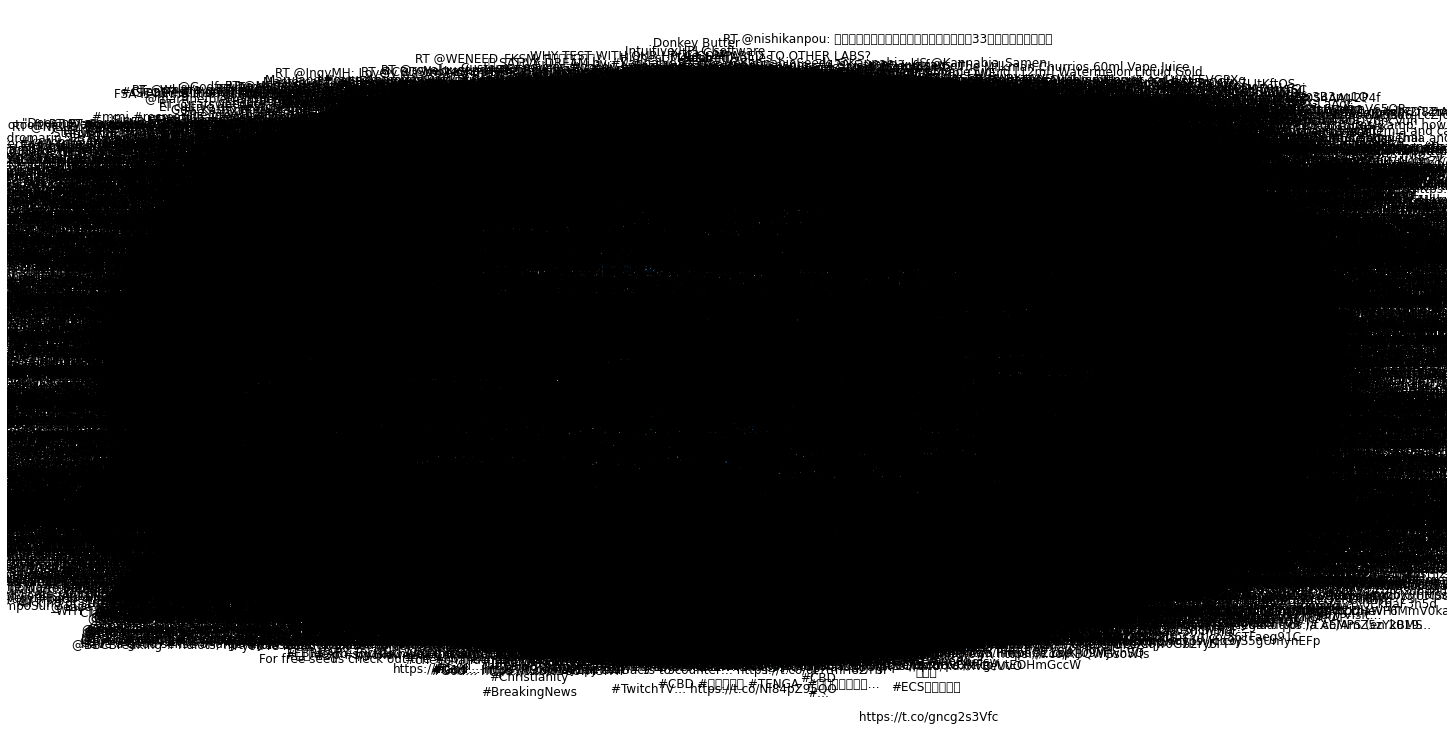

In [24]:
#draw network graph

graph = nx.DiGraph()  
graph.add_edges_from(final['nodes'])


plt.figure(figsize = (20, 10))

nx.draw(graph, with_labels = True, node_size = 50, font_size = 12)  
plt.show()

In [25]:
degree = nx.degree_centrality(graph)
between = nx.betweenness_centrality(graph)
close = nx.closeness_centrality(graph)

In [26]:
network_df = pd.DataFrame([degree, between,close]).T
network_df.columns = ['degree', 'betweeness', 'closeness']

In [27]:
network_df = network_df.reset_index()

network_df.rename(columns = {'index':'Username'}, inplace = True)

In [28]:
tweets = pd.read_csv('marijuana.csv')
tweets.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers
0,0,Medical #cannabis sales in #Arkansas surpassed...,1,0,2022-02-25 22:01:52+00:00,ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643
1,1,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...,0,1,2022-02-25 22:01:11+00:00,AlanRiseboro7,139,NaN,241,23
2,2,What are 1-4 issues you want to fix in South D...,0,0,2022-02-25 22:01:07+00:00,JodellWb,46712,Dog lover,1458,327
3,3,RT @LePro_1: ☮️ Make Art Not War! ☮️🕊️🌿\n\nCry...,0,33,2022-02-25 22:01:01+00:00,Ikky_Arts,5929,🚀 Fractal Multiverse Collection\n👉 100 Unique ...,1313,1591
4,4,The Pennsylvania Department of Agriculture is ...,0,0,2022-02-25 22:00:59+00:00,JuanLaceyFCB,0,Farms Close By - CEO,3,2


In [29]:
tweets['Username'] = tweets.apply(add_a, axis = 1)

In [30]:
tweets = tweets.merge(network_df, on = 'Username')
tweets.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers,degree,betweeness,closeness
0,0,Medical #cannabis sales in #Arkansas surpassed...,1,0,2022-02-25 22:01:52+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,0.000618,0.0,0.000618
1,1506,A recent #NewMexico Supreme Court ruling confi...,4,2,2022-02-25 18:44:37+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,0.000618,0.0,0.000618
2,2123,#NewJersey Gov. Phil Murphy (D) recently indic...,8,3,2022-02-25 17:38:42+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,0.000618,0.0,0.000618
3,2684,A #California proposal is seeking to suspend t...,3,1,2022-02-25 16:36:13+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,0.000618,0.0,0.000618
4,1,RT @KeepfitKingdom: NO SLEEP? Then CBD or Krat...,0,1,2022-02-25 22:01:11+00:00,@AlanRiseboro7,139,NaN,241,23,0.000155,0.0,0.000155


In [31]:
tweets.rename(columns = {'Following':'A_following_count', 'Followers': 'A_follower_count'}, inplace = True)

In [33]:
#create dataframe with information from User_B

for_b = pd.read_csv('marijuana.csv')

for_b['Username'] = for_b.apply(add_a, axis = 1)
for_b['User_B'] = for_b.apply(find_b, axis = 1)
for_b['User_B'] = for_b.apply(lambda x: x['User_B'][0], axis = 1)
for_b.rename(columns = {'Username':'User_A'}, inplace = True)
for_b['Type'] = for_b.apply(extract_type, axis = 1)
for_b = for_b.merge(network_df, left_on = 'User_B', right_on = 'Username')
for_b.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,User_A,Likes,User Description,Following,Followers,User_B,Type,Username,degree,betweeness,closeness
0,0,Medical #cannabis sales in #Arkansas surpassed...,1,0,2022-02-25 22:01:52+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,@ganjapreneur,Tweet,@ganjapreneur,0.000618,0.0,0.000618
1,1383,RT @ganjapreneur: A recent #NewMexico Supreme ...,0,2,2022-02-25 19:01:14+00:00,@rootwurks,7,We make compliance and education tools for can...,422,38,@ganjapreneur,Retweet,@ganjapreneur,0.000618,0.0,0.000618
2,1501,RT @ganjapreneur: A recent #NewMexico Supreme ...,0,2,2022-02-25 18:45:25+00:00,@REGULATEDpod,5927,Legal and business news podcast from former re...,3164,636,@ganjapreneur,Retweet,@ganjapreneur,0.000618,0.0,0.000618
3,1506,A recent #NewMexico Supreme Court ruling confi...,4,2,2022-02-25 18:44:37+00:00,@ganjapreneur,11388,Ganjapreneur is the industry leader in cannabi...,2780,38643,@ganjapreneur,Tweet,@ganjapreneur,0.000618,0.0,0.000618
4,1742,RT @ganjapreneur: #NewJersey Gov. Phil Murphy ...,0,3,2022-02-25 18:18:18+00:00,@REGULATEDpod,5927,Legal and business news podcast from former re...,3164,636,@ganjapreneur,Retweet,@ganjapreneur,0.000618,0.0,0.000618


In [34]:
#add user_b 
tweets_merged_b = tweets.merge(for_b, left_index = True, right_index = True, suffixes = ('_a', '_b'))

tweets_merged_b = tweets_merged_b[['User_A', 'Likes_a', 'A_follower_count', 'A_following_count', 
                                   'Tweet Favorite Count_a', 'User_B', 'Type',
                                   'degree_a', 'betweeness_a', 'closeness_a',
                                   'degree_b', 'betweeness_b', 'closeness_b']]

tweets_merged_b.head()

,User_A,Likes_a,A_follower_count,A_following_count,Tweet Favorite Count_a,User_B,Type,degree_a,betweeness_a,closeness_a,degree_b,betweeness_b,closeness_b
0,@ganjapreneur,11388,38643,2780,1,@ganjapreneur,Tweet,0.000618,0.0,0.000618,0.000618,0.0,0.000618
1,@rootwurks,11388,38643,2780,4,@ganjapreneur,Retweet,0.000618,0.0,0.000618,0.000618,0.0,0.000618
2,@REGULATEDpod,11388,38643,2780,8,@ganjapreneur,Retweet,0.000618,0.0,0.000618,0.000618,0.0,0.000618
3,@ganjapreneur,11388,38643,2780,3,@ganjapreneur,Tweet,0.000618,0.0,0.000618,0.000618,0.0,0.000618
4,@REGULATEDpod,139,23,241,0,@ganjapreneur,Retweet,0.000155,0.0,0.000155,0.000618,0.0,0.000618


In [35]:
#merge to match user a and user b

tweets_merged = tweets_merged_b.merge(tweets_merged_b, left_on = 'User_B', right_on = 'User_A', how = 'left')

tweets_merged = tweets_merged.drop_duplicates(
  subset = ['User_A_x', 'User_B_x'],
  keep = 'last').reset_index(drop = True).dropna()
tweets_merged.rename(columns = {'User_A_x':'User_A','User_B_x':'User_B', 'Type_x':'Type', 'A_follower_count_x':
                                'A_follower_count','A_following_count_x':'A_following_count','A_follower_count_y':'B_follower_count',
                                'A_following_count_y':'B_following_count', 'degree_a_x':'A_network_feature_1',
                                'closeness_a_x' :'A_network_feature_2', 'betweeness_a_x': 'A_network_feature_3',
                                'degree_b_x':'B_network_feature_1',
                                'closeness_b_x': 'B_network_feature_2', 'betweeness_b_x': 'B_network_feature_3'}, inplace = True)
tweets_merged.iloc[0:25]

,User_A,Likes_a_x,A_follower_count,A_following_count,Tweet Favorite Count_a_x,User_B,Type,A_network_feature_1,A_network_feature_3,A_network_feature_2,...,B_following_count,Tweet Favorite Count_a_y,User_B_y,Type_y,degree_a_y,betweeness_a_y,closeness_a_y,degree_b_y,betweeness_b_y,closeness_b_y
0,@rootwurks,11388,38643,2780,4,@ganjapreneur,Retweet,0.000618,0.0,0.000618,...,1460.0,0.0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,0.000618,0.0,0.000618
1,@HighGroundCann,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,1460.0,0.0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,0.000618,0.0,0.000618
2,@10000Bakes,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,1460.0,0.0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,0.000618,0.0,0.000618
3,@REGULATEDpod,46717,327,1460,1,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,1460.0,0.0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,0.000618,0.0,0.000618
4,@ganjapreneur,46717,327,1460,0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,...,1460.0,0.0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,0.000618,0.0,0.000618
5,@JodellWb,5929,1591,1313,0,@JodellWb,Tweet,0.000155,0.0,0.000155,...,1313.0,0.0,@JodellWb,Tweet,0.000155,0.0,0.000155,0.000773,0.0,0.000773
6,@Ikky_Arts,0,2,3,0,@LePro_1,Retweet,0.000155,0.0,0.000155,...,2108.0,0.0,@TheMarfs,Reply,0.000618,0.0,0.000618,0.000155,0.0,0.000155
7,@MeMeeple,458,1168,662,0,@LePro_1,Retweet,0.000155,0.0,0.000155,...,2108.0,0.0,@TheMarfs,Reply,0.000618,0.0,0.000618,0.000155,0.0,0.000155
8,@_Adm96_,0,293,257,0,@LePro_1,Retweet,0.000155,0.0,0.000155,...,2108.0,0.0,@TheMarfs,Reply,0.000618,0.0,0.000618,0.000155,0.0,0.000155
9,@WangnerXx,8792,499,4940,0,@LePro_1,Retweet,0.000155,0.0,0.000155,...,2108.0,0.0,@TheMarfs,Reply,0.000618,0.0,0.000618,0.000155,0.0,0.000155


In [37]:
#find mentions received and sent for each user

mentions_received = {}
mentions_sent = {}

count = 0

for tup in tweets_merged.iterrows():
    row = tup[1]
    kind = row['Type']
    if kind == 'Mention':
        b = row['User_B']
        a = row['User_A']
        if b in mentions_received:
            mentions_received[b] += 1
        else:
            mentions_received[b] = 1
        if a in mentions_sent:
            mentions_sent[a] += 1
        else:
            mentions_sent[a] = 1

In [38]:
tweets_merged['A_mentions_received'] = tweets_merged['User_A'].map(mentions_received)
tweets_merged['A_mentions_sent'] = tweets_merged['User_A'].map(mentions_sent)
tweets_merged['B_mentions_received'] = tweets_merged['User_B'].map(mentions_received)
tweets_merged['B_mentions_sent'] = tweets_merged['User_B'].map(mentions_sent)
tweets_merged.fillna(0, inplace=True)
tweets_merged.head()

,User_A,Likes_a_x,A_follower_count,A_following_count,Tweet Favorite Count_a_x,User_B,Type,A_network_feature_1,A_network_feature_3,A_network_feature_2,...,degree_a_y,betweeness_a_y,closeness_a_y,degree_b_y,betweeness_b_y,closeness_b_y,A_mentions_received,A_mentions_sent,B_mentions_received,B_mentions_sent
0,@rootwurks,11388,38643,2780,4,@ganjapreneur,Retweet,0.000618,0.0,0.000618,...,0.000773,0.0,0.000773,0.000618,0.0,0.000618,0.0,0.0,0.0,0.0
1,@HighGroundCann,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.000773,0.0,0.000773,0.000618,0.0,0.000618,0.0,0.0,0.0,0.0
2,@10000Bakes,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.000773,0.0,0.000773,0.000618,0.0,0.000618,0.0,0.0,0.0,0.0
3,@REGULATEDpod,46717,327,1460,1,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.000773,0.0,0.000773,0.000618,0.0,0.000618,0.0,0.0,0.0,0.0
4,@ganjapreneur,46717,327,1460,0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,...,0.000773,0.0,0.000773,0.000618,0.0,0.000618,0.0,0.0,0.0,0.0


In [39]:
#find retweets received and sent for each user

retweets_received = {}
retweets_sent = {}

count = 0

for tup in tweets_merged.iterrows():
    row = tup[1]
    kind = row['Type']
    if kind == 'Retweet':
        b = row['User_B']
        a = row['User_A']
        if b in retweets_received:
            retweets_received[b] += 1
        else:
            retweets_received[b] = 1
        if a in retweets_sent:
            retweets_sent[a] += 1
        else:
            retweets_sent[a] = 1

In [40]:
tweets_merged['A_retweets_received'] = tweets_merged['User_A'].map(retweets_received)
tweets_merged['B_retweets_received'] = tweets_merged['User_B'].map(retweets_received)
tweets_merged['A_retweets_sent'] = tweets_merged['User_A'].map(retweets_sent)
tweets_merged['B_retweets_sent'] = tweets_merged['User_B'].map(retweets_sent)
tweets_merged.fillna(0, inplace=True)
tweets_merged.head()

,User_A,Likes_a_x,A_follower_count,A_following_count,Tweet Favorite Count_a_x,User_B,Type,A_network_feature_1,A_network_feature_3,A_network_feature_2,...,betweeness_b_y,closeness_b_y,A_mentions_received,A_mentions_sent,B_mentions_received,B_mentions_sent,A_retweets_received,B_retweets_received,A_retweets_sent,B_retweets_sent
0,@rootwurks,11388,38643,2780,4,@ganjapreneur,Retweet,0.000618,0.0,0.000618,...,0.0,0.000618,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
1,@HighGroundCann,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.0,0.000618,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0
2,@10000Bakes,46712,327,1458,0,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.0,0.000618,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
3,@REGULATEDpod,46717,327,1460,1,@ganjapreneur,Retweet,0.000773,0.0,0.000773,...,0.0,0.000618,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
4,@ganjapreneur,46717,327,1460,0,@ganjapreneur,Tweet,0.000773,0.0,0.000773,...,0.0,0.000618,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0


In [41]:
User_A = tweets_merged.User_A
User_B = tweets_merged.User_B

In [43]:
tweets_merged_num = tweets_merged[['A_follower_count','A_following_count','A_mentions_received', 'A_mentions_sent',
                                   'A_retweets_received', 'A_retweets_sent','B_mentions_sent','B_follower_count','B_following_count',
                                   'B_mentions_received','B_retweets_received','B_retweets_sent',
                                   'A_network_feature_1', 'A_network_feature_2', 'A_network_feature_3',
                                   'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3']]
tweets_merged_num = (tweets_merged_num - tweets_merged_num.mean())/tweets_merged_num.std()
tweets_merged_num.head()

,A_follower_count,A_following_count,A_mentions_received,A_mentions_sent,A_retweets_received,A_retweets_sent,B_mentions_sent,B_follower_count,B_following_count,B_mentions_received,B_retweets_received,B_retweets_sent,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0.275722,0.041158,-0.125436,-0.092143,-0.159626,-0.178091,-0.153638,-0.058267,-0.054737,-0.263175,-0.350285,-0.203648,-0.316298,-0.316298,NaN,0.011744,0.011744,NaN
1,-0.069932,-0.107954,-0.125436,-0.092143,-0.159626,0.614253,-0.153638,-0.058267,-0.054737,-0.263175,-0.350285,-0.203648,-0.283134,-0.283134,NaN,0.011744,0.011744,NaN
2,-0.069932,-0.107954,-0.125436,-0.092143,-0.159626,-0.046034,-0.153638,-0.058267,-0.054737,-0.263175,-0.350285,-0.203648,-0.283134,-0.283134,NaN,0.011744,0.011744,NaN
3,-0.069932,-0.107728,-0.125436,-0.092143,-0.159626,-0.178091,-0.153638,-0.058267,-0.054737,-0.263175,-0.350285,-0.203648,-0.283134,-0.283134,NaN,0.011744,0.011744,NaN
4,-0.069932,-0.107728,-0.125436,-0.092143,0.705332,-0.310149,-0.153638,-0.058267,-0.054737,-0.263175,-0.350285,-0.203648,-0.283134,-0.283134,NaN,0.011744,0.011744,NaN


In [44]:
#find A-B difference for relevant columns in merged dataset


tweets_merged_num['follower_count'] = tweets_merged_num['A_follower_count'] - tweets_merged_num['B_follower_count']
tweets_merged_num['following_count'] = tweets_merged_num['A_following_count'] - tweets_merged_num['B_following_count']
tweets_merged_num['mentions_received'] = tweets_merged_num['A_mentions_received'] - tweets_merged_num['B_mentions_received']
tweets_merged_num['retweets_received'] = tweets_merged_num['A_retweets_received'] - tweets_merged_num['B_retweets_received']
tweets_merged_num['mentions_sent'] = tweets_merged_num['A_mentions_sent'] - tweets_merged_num['B_mentions_sent']
tweets_merged_num['retweets_sent'] = tweets_merged_num['A_retweets_sent'] - tweets_merged_num['B_retweets_sent']
tweets_merged_num['network_feature_1'] = tweets_merged_num['A_network_feature_1'] - tweets_merged_num['B_network_feature_1']
tweets_merged_num['network_feature_2'] = tweets_merged_num['A_network_feature_2'] - tweets_merged_num['B_network_feature_2']
tweets_merged_num['network_feature_3'] = tweets_merged_num['A_network_feature_3'] - tweets_merged_num['B_network_feature_3']

In [45]:
#find A/B ratio for relevant columns in merged dataset

tweets_merged_num['follower_div'] = tweets_merged_num['A_follower_count'] / tweets_merged_num['B_follower_count']
tweets_merged_num['following_div'] = tweets_merged_num['A_following_count'] / tweets_merged_num['B_following_count']
tweets_merged_num['mentionsreceived_div'] = tweets_merged_num['A_mentions_received'] / tweets_merged_num['B_mentions_received']
tweets_merged_num['retweetsreceived_div'] = tweets_merged_num['A_retweets_received'] / tweets_merged_num['B_retweets_received']
tweets_merged_num['mentionssent_div'] = tweets_merged_num['A_mentions_sent'] / tweets_merged_num['B_mentions_sent']
tweets_merged_num['retweetssent_div'] = tweets_merged_num['A_retweets_sent'] / tweets_merged_num['B_retweets_sent']
tweets_merged_num['network1_div'] = tweets_merged_num['A_network_feature_1'] / tweets_merged_num['B_network_feature_1']
tweets_merged_num['network2_div'] = tweets_merged_num['A_network_feature_2'] / tweets_merged_num['B_network_feature_2']
tweets_merged_num['network3_div'] = tweets_merged_num['A_network_feature_3'] / tweets_merged_num['B_network_feature_3']